Code Yang Berhasil

In [1]:
# Tokenization dan Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load dataset
with open('nietzsche.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()

# Tokenisasi karakter
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts([text])
total_chars = len(tokenizer.word_index) + 1

# Membuat input-output sequence
seq_length = 40
sequences = []
for i in range(seq_length, len(text)):
    seq = text[i-seq_length:i+1]
    sequences.append([tokenizer.word_index[char] for char in seq if char in tokenizer.word_index])

# Pisahkan input dan label
sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=total_chars)

# Padding dan reshape ke 3D untuk LSTM
X = pad_sequences(X, maxlen=seq_length)
X = np.expand_dims(X, -1)  # (samples, timesteps, features)

# Pembangunan Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard

model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, 1)))
model.add(Dense(64, activation='relu'))  # ANN tambahan
model.add(Dense(total_chars, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='loss')
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3)
tensorboard = TensorBoard(log_dir='./logs')

# Training
model.fit(X, y, batch_size=128, epochs=20, callbacks=[checkpoint, reduce_lr, tensorboard])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4690/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2294 - loss: 2.7392

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.2294 - loss: 2.7390 - learning_rate: 0.0010
Epoch 2/20
4694/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3368 - loss: 2.3037

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.3368 - loss: 2.3036 - learning_rate: 0.0010
Epoch 3/20
4687/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3777 - loss: 2.1559

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.3777 - loss: 2.1559 - learning_rate: 0.0010
Epoch 4/20
4693/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4047 - loss: 2.0586

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.4047 - loss: 2.0586 - learning_rate: 0.0010
Epoch 5/20
4689/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4242 - loss: 1.9872

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.4242 - loss: 1.9872 - learning_rate: 0.0010
Epoch 6/20
4689/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4383 - loss: 1.9337

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.4383 - loss: 1.9337 - learning_rate: 0.0010
Epoch 7/20
4692/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4497 - loss: 1.8912

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.4497 - loss: 1.8912 - learning_rate: 0.0010
Epoch 8/20
4687/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4587 - loss: 1.8608

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.4587 - loss: 1.8608 - learning_rate: 0.0010
Epoch 9/20
4694/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4669 - loss: 1.8306

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.4669 - loss: 1.8306 - learning_rate: 0.0010
Epoch 10/20
4692/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4728 - loss: 1.8080

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.4728 - loss: 1.8080 - learning_rate: 0.0010
Epoch 11/20
4694/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4776 - loss: 1.7903

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.4776 - loss: 1.7903 - learning_rate: 0.0010
Epoch 12/20
4690/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4837 - loss: 1.7707

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.4837 - loss: 1.7707 - learning_rate: 0.0010
Epoch 13/20
4690/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4893 - loss: 1.7484

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.4893 - loss: 1.7484 - learning_rate: 0.0010
Epoch 14/20
4687/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4918 - loss: 1.7393

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.4918 - loss: 1.7393 - learning_rate: 0.0010
Epoch 15/20
4695/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4963 - loss: 1.7246

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.4963 - loss: 1.7246 - learning_rate: 0.0010
Epoch 16/20
4695/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5002 - loss: 1.7128

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.5002 - loss: 1.7128 - learning_rate: 0.0010
Epoch 17/20
4688/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5019 - loss: 1.7020

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.5019 - loss: 1.7020 - learning_rate: 0.0010
Epoch 18/20
4691/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5055 - loss: 1.6874

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.5055 - loss: 1.6874 - learning_rate: 0.0010
Epoch 19/20
4691/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5094 - loss: 1.6803

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.5093 - loss: 1.6803 - learning_rate: 0.0010
Epoch 20/20
4688/4695 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5115 - loss: 1.6670

4695/4695 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.5115 - loss: 1.6671 - learning_rate: 0.0010


In [4]:
def predict_next_chars(seed_text, next_chars=1):
    for _ in range(next_chars):
        token_list = [tokenizer.word_index[char] for char in seed_text if char in tokenizer.word_index]
        token_list = pad_sequences([token_list], maxlen=seq_length, padding='pre')
        token_list = np.expand_dims(token_list, -1)  # (1, timesteps, features)

        predicted_index = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]

        # Temukan karakter yang sesuai
        output_char = ''
        for char, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_char = char
                break

        seed_text += output_char
    return seed_text


In [32]:
print(predict_next_chars("at the weather", next_chars=20))


at the weather the same that is a 


In [34]:
print(predict_next_chars("collection", next_chars=10))


collection of the sa


In [31]:
print(predict_next_chars("what a strenuous", next_chars=20))


what a strenuous and something the s


In [33]:
print(predict_next_chars("stop the script", next_chars=20))


stop the scripted the same the most


In [37]:
# Jika kamu sudah punya callback sebelumnya:
callbacks = [checkpoint, reduce_lr, tensorboard]

# Maka panggil model.fit seperti ini:
history = model.fit(X, y, batch_size=128, epochs=20, validation_split=0.2, callbacks=callbacks)



Epoch 1/20
3750/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5121 - loss: 1.6720

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.5121 - loss: 1.6720 - val_accuracy: 0.5171 - val_loss: 1.6448 - learning_rate: 0.0010
Epoch 2/20
3755/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5146 - loss: 1.6586

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.5146 - loss: 1.6586 - val_accuracy: 0.5110 - val_loss: 1.6553 - learning_rate: 0.0010
Epoch 3/20
3748/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5170 - loss: 1.6511

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.5169 - loss: 1.6511 - val_accuracy: 0.5139 - val_loss: 1.6532 - learning_rate: 0.0010
Epoch 4/20
3756/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5168 - loss: 1.6481

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.5168 - loss: 1.6481 - val_accuracy: 0.5134 - val_loss: 1.6541 - learning_rate: 0.0010
Epoch 5/20
3753/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5192 - loss: 1.6391

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.5192 - loss: 1.6391 - val_accuracy: 0.5135 - val_loss: 1.6572 - learning_rate: 0.0010
Epoch 6/20
3751/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5213 - loss: 1.6332

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.5213 - loss: 1.6332 - val_accuracy: 0.5115 - val_loss: 1.6542 - learning_rate: 0.0010
Epoch 7/20
3752/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5228 - loss: 1.6280

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.5228 - loss: 1.6280 - val_accuracy: 0.5147 - val_loss: 1.6490 - learning_rate: 0.0010
Epoch 8/20
3750/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5231 - loss: 1.6240

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.5231 - loss: 1.6240 - val_accuracy: 0.5178 - val_loss: 1.6483 - learning_rate: 0.0010
Epoch 9/20
3754/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5240 - loss: 1.6170

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.5240 - loss: 1.6170 - val_accuracy: 0.5121 - val_loss: 1.6594 - learning_rate: 0.0010
Epoch 10/20
3753/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5261 - loss: 1.6133

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.5261 - loss: 1.6133 - val_accuracy: 0.5170 - val_loss: 1.6527 - learning_rate: 0.0010
Epoch 11/20
3756/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5268 - loss: 1.6095

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.5268 - loss: 1.6095 - val_accuracy: 0.5140 - val_loss: 1.6481 - learning_rate: 0.0010
Epoch 12/20
3753/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5268 - loss: 1.6048

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.5268 - loss: 1.6049 - val_accuracy: 0.5162 - val_loss: 1.6426 - learning_rate: 0.0010
Epoch 13/20
3755/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5296 - loss: 1.6019

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.5296 - loss: 1.6019 - val_accuracy: 0.5146 - val_loss: 1.6467 - learning_rate: 0.0010
Epoch 14/20
3749/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5283 - loss: 1.6011

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.5283 - loss: 1.6011 - val_accuracy: 0.5169 - val_loss: 1.6419 - learning_rate: 0.0010
Epoch 15/20
3749/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5297 - loss: 1.5963

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.5297 - loss: 1.5964 - val_accuracy: 0.5149 - val_loss: 1.6452 - learning_rate: 0.0010
Epoch 16/20
3750/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5310 - loss: 1.5929

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.5310 - loss: 1.5929 - val_accuracy: 0.5159 - val_loss: 1.6450 - learning_rate: 0.0010
Epoch 17/20
3752/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5321 - loss: 1.5892

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.5321 - loss: 1.5892 - val_accuracy: 0.5178 - val_loss: 1.6433 - learning_rate: 0.0010
Epoch 18/20
3754/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5338 - loss: 1.5829

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.5338 - loss: 1.5829 - val_accuracy: 0.5140 - val_loss: 1.6462 - learning_rate: 0.0010
Epoch 19/20
3748/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5336 - loss: 1.5816

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.5336 - loss: 1.5816 - val_accuracy: 0.5159 - val_loss: 1.6440 - learning_rate: 0.0010
Epoch 20/20
3753/3756 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5337 - loss: 1.5830

3756/3756 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.5337 - loss: 1.5830 - val_accuracy: 0.5202 - val_loss: 1.6431 - learning_rate: 0.0010


In [38]:
history = model.fit(X, y, batch_size=128, epochs=20, validation_split=0.2)


Epoch 1/20
 689/3756 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5310 - loss: 1.5910

KeyboardInterrupt: 

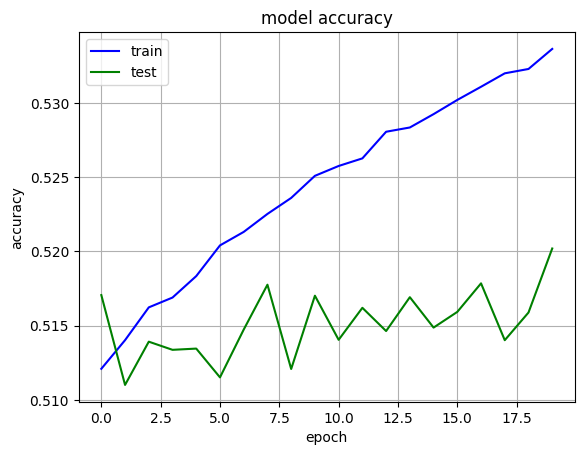

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train', color='blue')
plt.plot(history.history['val_accuracy'], label='test', color='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1284 - loss: 3.1803

603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.1284 - loss: 3.1801 - val_accuracy: 0.1629 - val_loss: 3.0099 - learning_rate: 0.0010
Epoch 2/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1608 - loss: 2.9442

603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1609 - loss: 2.9441 - val_accuracy: 0.1655 - val_loss: 2.9011 - learning_rate: 0.0010
Epoch 3/20
598/603 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1900 - loss: 2.8216

603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1900 - loss: 2.8214 - val_accuracy: 0.2077 - val_loss: 2.7992 - learning_rate: 0.0010
Epoch 4/20
600/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2157 - loss: 2.7388

603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2157 - loss: 2.7387 - val_accuracy: 0.2212 - val_loss: 2.7573 - learning_rate: 0.0010
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2268 - loss: 2.6860

603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2268 - loss: 2.6860 - val_accuracy: 0.2413 - val_loss: 2.7067 - learning_rate: 0.0010
Epoch 6/20
599/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2429 - loss: 2.6452

603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2429 - loss: 2.6451 - val_accuracy: 0.2473 - val_loss: 2.6808 - learning_rate: 0.0010
Epoch 7/20
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2522 - loss: 2.6081

603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2522 - loss: 2.6080 - val_accuracy: 0.2431 - val_loss: 2.6506 - learning_rate: 0.0010
Epoch 8/20
597/603 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2570 - loss: 2.5763

603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2571 - loss: 2.5762 - val_accuracy: 0.2544 - val_loss: 2.6212 - learning_rate: 0.0010
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2650 - loss: 2.5379

603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2650 - loss: 2.5378 - val_accuracy: 0.2594 - val_loss: 2.6024 - learning_rate: 0.0010
Epoch 10/20
599/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2727 - loss: 2.5056

603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2727 - loss: 2.5055 - val_accuracy: 0.2639 - val_loss: 2.5791 - learning_rate: 0.0010
Epoch 11/20
598/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2776 - loss: 2.4914

603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2777 - loss: 2.4912 - val_accuracy: 0.2713 - val_loss: 2.5498 - learning_rate: 0.0010
Epoch 12/20
598/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2843 - loss: 2.4561

603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2843 - loss: 2.4560 - val_accuracy: 0.2754 - val_loss: 2.5356 - learning_rate: 0.0010
Epoch 13/20
601/603 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2891 - loss: 2.4365

603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2891 - loss: 2.4365 - val_accuracy: 0.2749 - val_loss: 2.5250 - learning_rate: 0.0010
Epoch 14/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2929 - loss: 2.4106

603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2929 - loss: 2.4106 - val_accuracy: 0.2835 - val_loss: 2.5062 - learning_rate: 0.0010
Epoch 15/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3008 - loss: 2.3897

603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3008 - loss: 2.3897 - val_accuracy: 0.2815 - val_loss: 2.5017 - learning_rate: 0.0010
Epoch 16/20
600/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3013 - loss: 2.3784

603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3013 - loss: 2.3783 - val_accuracy: 0.2854 - val_loss: 2.4863 - learning_rate: 0.0010
Epoch 17/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3111 - loss: 2.3451

603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3111 - loss: 2.3451 - val_accuracy: 0.2893 - val_loss: 2.4726 - learning_rate: 0.0010
Epoch 18/20
602/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3119 - loss: 2.3397

603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3119 - loss: 2.3397 - val_accuracy: 0.2911 - val_loss: 2.4864 - learning_rate: 0.0010
Epoch 19/20
599/603 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3182 - loss: 2.3187

603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3182 - loss: 2.3187 - val_accuracy: 0.2971 - val_loss: 2.4569 - learning_rate: 0.0010
Epoch 20/20
596/603 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3178 - loss: 2.3028

603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3178 - loss: 2.3028 - val_accuracy: 0.2991 - val_loss: 2.4521 - learning_rate: 0.0010


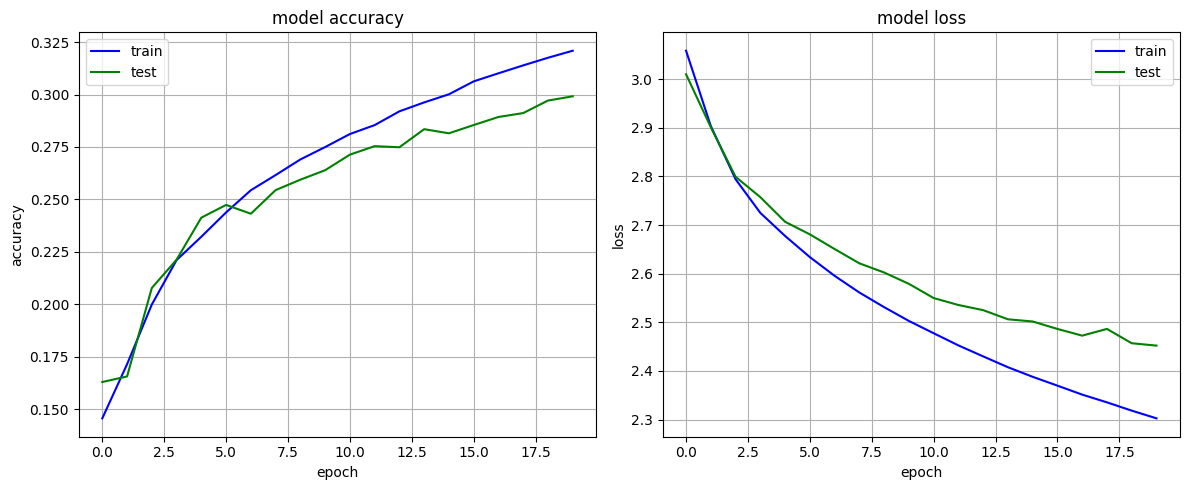

In [41]:
# Import semua library
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# 1. Load dan Bersihkan Data
with open('nietzsche.txt', 'r', encoding='utf-8') as f:
    text = f.read()

text = text.replace('\n', ' ').replace('\r', ' ').replace('\ufeff', ' ')
text = ' '.join(list(dict.fromkeys(text.split())))  # hapus kata duplikat

# 2. Tokenisasi Karakter
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts([text])
total_chars = len(tokenizer.word_index) + 1

# Simpan tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# 3. Buat Sequences (dengan validasi panjang)
seq_length = 40
sequences = []
for i in range(seq_length, len(text)):
    seq = text[i - seq_length:i + 1]
    if all(c in tokenizer.word_index for c in seq):
        encoded = [tokenizer.word_index[c] for c in seq]
        sequences.append(encoded)

# 4. Siapkan X dan y
sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=total_chars)
X = pad_sequences(X, maxlen=seq_length)
X = np.expand_dims(X, -1)

# 5. Callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='loss')
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3)
tensorboard = TensorBoard(log_dir='./logs')
callbacks = [checkpoint, reduce_lr, tensorboard]

# 6. Bangun Model
model = Sequential([
    LSTM(128, input_shape=(seq_length, 1)),
    Dense(64, activation='relu'),
    Dense(total_chars, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Training
history = model.fit(X, y, batch_size=128, epochs=20, validation_split=0.2, callbacks=callbacks)

# 8. Visualisasi Akurasi dan Loss
plt.figure(figsize=(12, 5))

# Grafik akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train', color='blue')
plt.plot(history.history['val_accuracy'], label='test', color='green')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

# Grafik loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train', color='blue')
plt.plot(history.history['val_loss'], label='test', color='green')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('training_results.png')


In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def predict_next_chars(seed_text, next_chars=100):
    for _ in range(next_chars):
        token_list = [tokenizer.word_index.get(char, 0) for char in seed_text]
        token_list = pad_sequences([token_list], maxlen=seq_length, padding='pre')
        token_list = np.expand_dims(token_list, -1)  # (1, seq_length, 1)

        predicted_index = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
        output_char = ''
        for char, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_char = char
                break
        seed_text += output_char
    return seed_text


In [46]:
seed = "at the dull"
result = predict_next_chars(seed, next_chars=20)
print(result)


at the dullention aesiriols sel


# New Section